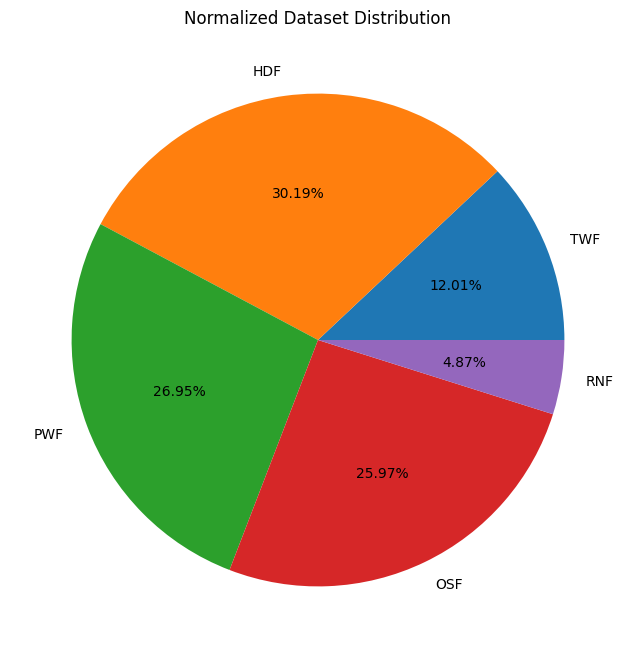

In [1]:
import matplotlib.pyplot as plt

# Data
labels = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
sizes = [0.004625, 0.011625, 0.010375, 0.010000, 0.001875]

# Normalize sizes
total = sum(sizes)
normalized_sizes = [size / total for size in sizes]

# Create pie chart
plt.figure(figsize=(10, 8))  # Increase the figure size
plt.pie(normalized_sizes, labels=labels, autopct='%1.2f%%')
plt.title('Normalized Dataset Distribution')

plt.savefig('piechart_originaldata.png', dpi=300, bbox_inches='tight')
plt.show()

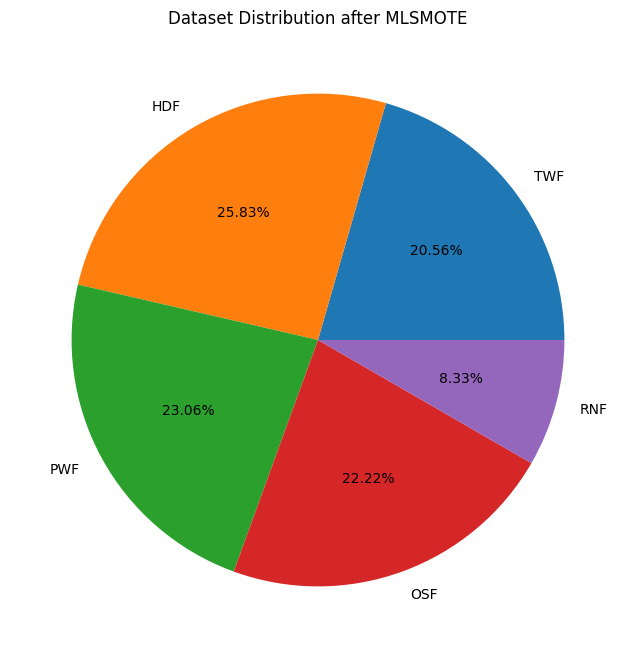

In [2]:
import matplotlib.pyplot as plt

# Data
labels = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
sizes = [0.009190, 0.011550, 0.010308, 0.009935, 0.003726]

# Normalize sizes
total = sum(sizes)
normalized_sizes = [size / total for size in sizes]

# Create pie chart
plt.figure(figsize=(10, 8))  # Increase the figure size
plt.pie(normalized_sizes, labels=labels, autopct='%1.2f%%')
plt.title('Dataset Distribution after MLSMOTE')

plt.savefig('Dataset Distribution after MLSMOTE.png', dpi=300, bbox_inches='tight')
plt.show()

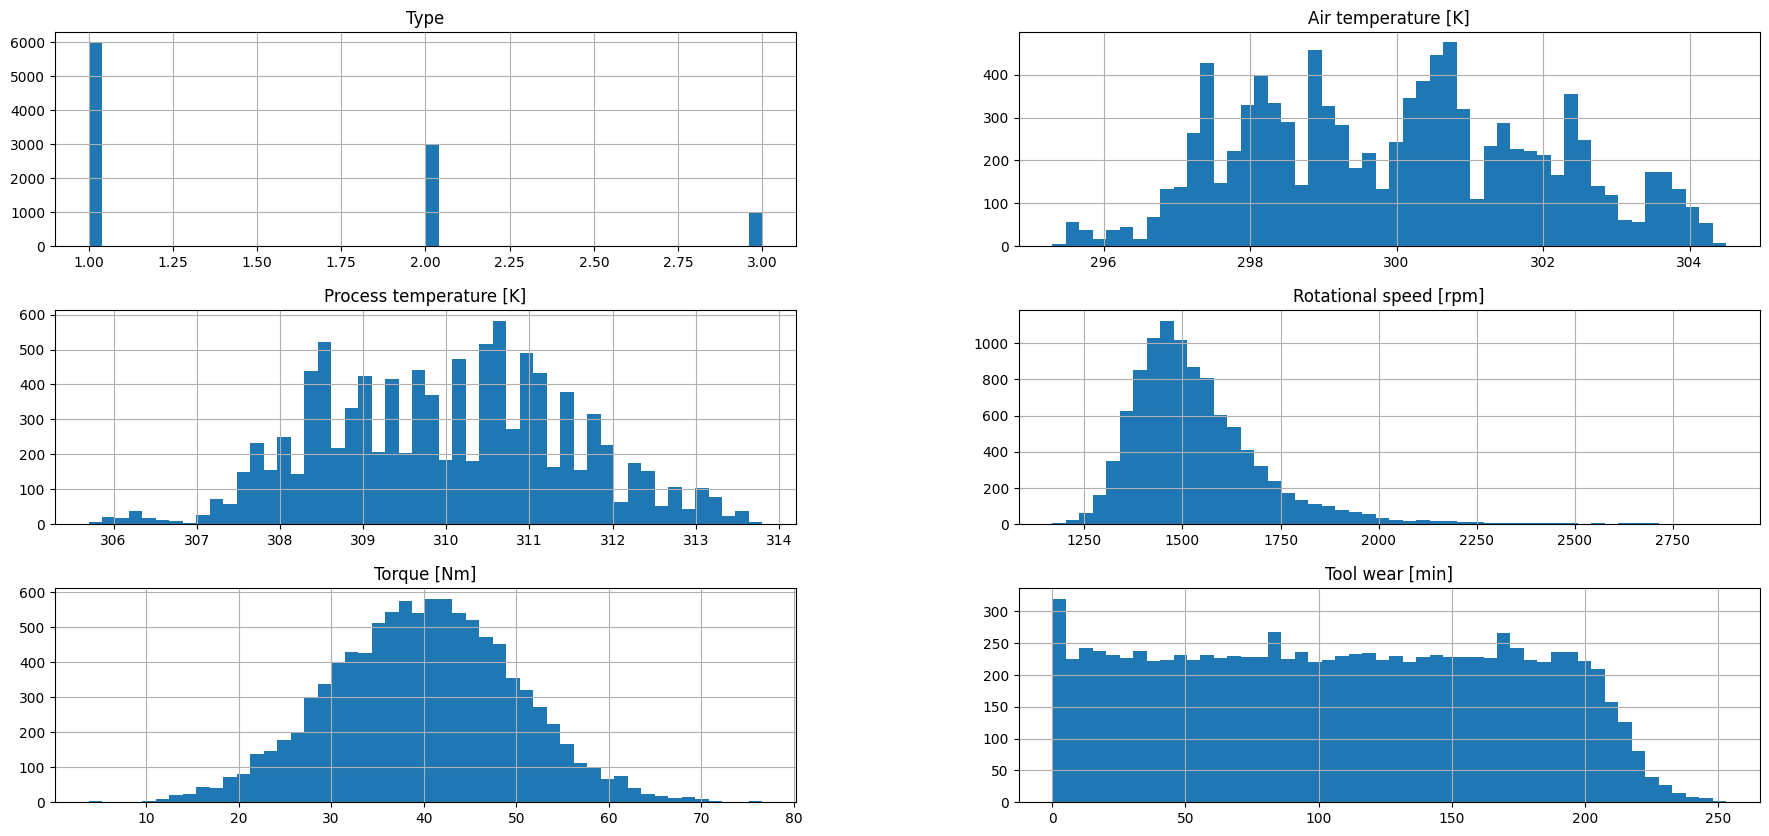

In [3]:
import copy
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('ai4i2020.csv')


def process_data(df):
    # replace L, M, H with 0, 1, 2 so it is numeric
    df['Type'] = df['Type'].replace(['L', 'M', 'H'], [1, 2, 3])

    # removing the old TWF, HDF, etc. columns as they are already accounted for
    df.drop(columns = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF','Machine failure'], inplace=True)

    # dropping the Product ID and UDI columnns as they are not necessary in model training
    df.drop(columns = ['UDI', 'Product ID'], inplace=True)


process_data(data)



# create a deep copy of the dataset
data1 = copy.deepcopy(data)


data1.hist(figsize = (22,10), bins = 50)
# save the plot to a file
plt.savefig('histogram_plot.png', dpi=300, bbox_inches='tight')
plt.show()

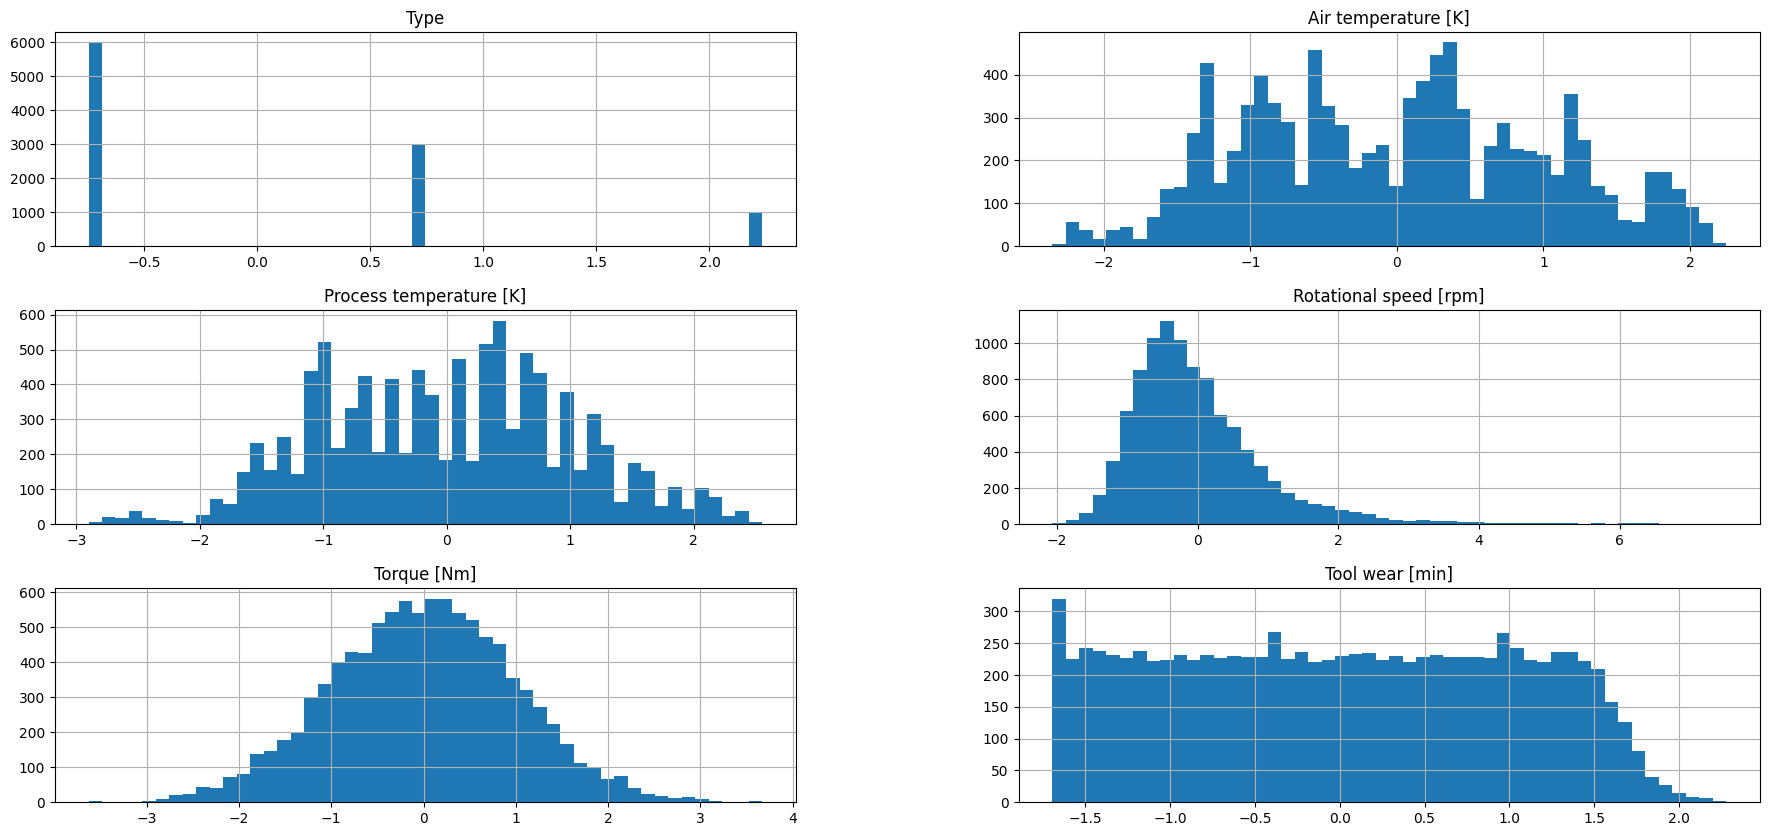

In [4]:
## dataset after normilization

from sklearn.preprocessing import LabelEncoder, StandardScaler,MultiLabelBinarizer
# create a deep copy of the dataset
data_norm = copy.deepcopy(data)

scaler = StandardScaler()
data_norm[ [   'Type'	,'Air temperature [K]'	,'Process temperature [K]'	,'Rotational speed [rpm]','Torque [Nm]'	,'Tool wear [min]'	      ]] = scaler.fit_transform(data_norm[ [   'Type'	,'Air temperature [K]'	,'Process temperature [K]'	,'Rotational speed [rpm]','Torque [Nm]'	,'Tool wear [min]'	      ]])



# data.drop(columns = ['Machine failure'], inplace=True)
data_norm.hist(figsize = (22,10), bins = 50)
# save the plot to a file
plt.savefig('_normlizaed_stad_histogram_plot.png', dpi=300, bbox_inches='tight')
plt.show()

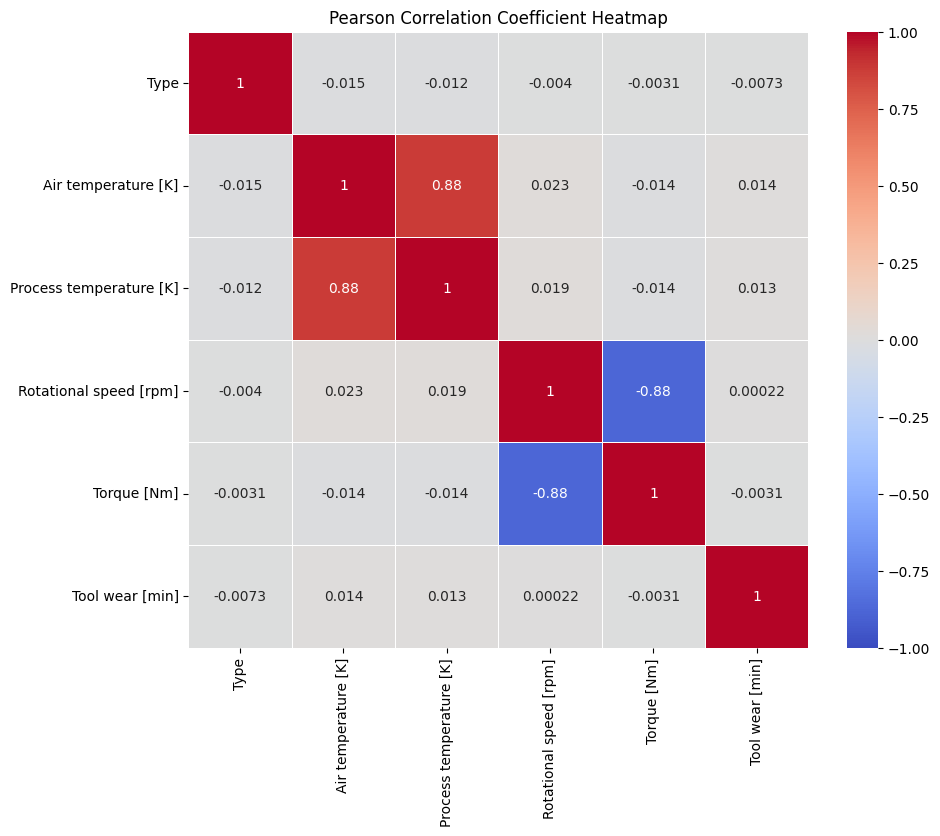

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Compute the Pearson correlation matrix
corr_matrix = data.corr(method='pearson')

# Plot the Pearson Correlation Coefficient Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Pearson Correlation Coefficient Heatmap')
# Save the plot to a file
plt.savefig("pearson_correlation_heatmap.png", dpi=300, bbox_inches='tight')

plt.show()

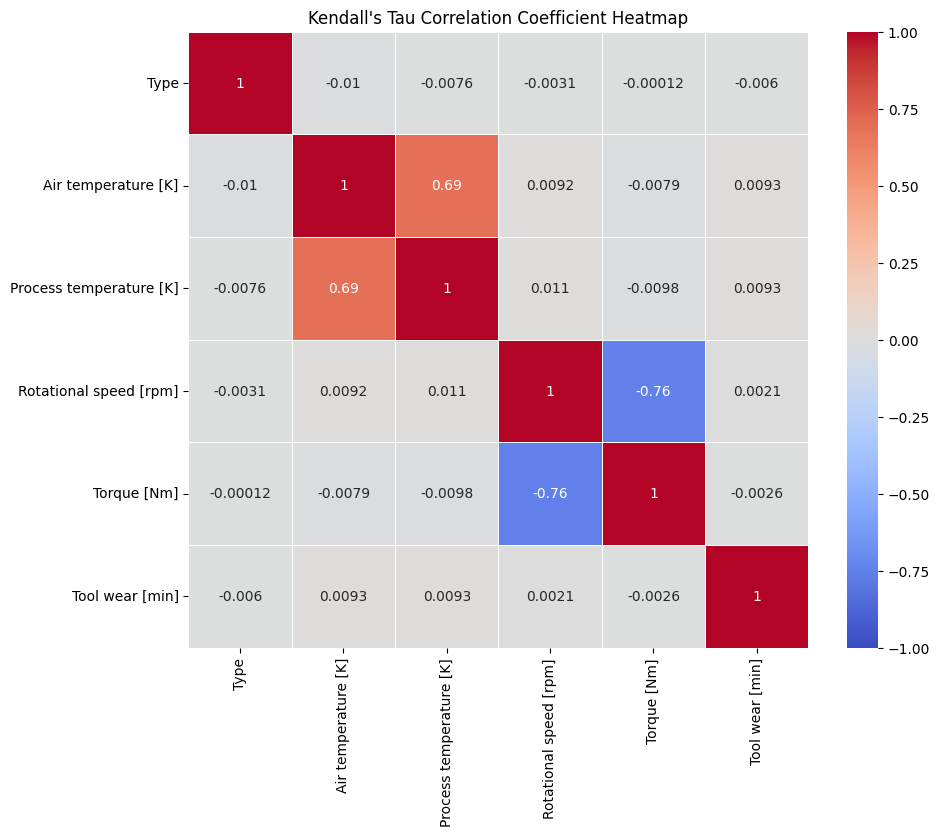

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Compute the Kendall's Tau correlation matrix
corr_matrix = data.corr(method='kendall')

# Plot the Kendall's Tau Correlation Coefficient Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Kendall's Tau Correlation Coefficient Heatmap")
# Save the plot to a file
plt.savefig("Kendall's Tau Correlation Coefficient Heatmap.png", dpi=300, bbox_inches='tight')

plt.show()